In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

✅ Datos cargados correctamente desde CLEAN.
✅ Columna `churn_date` eliminada de `megaline_users_clean.csv`.
✅ Transformación logarítmica aplicada a `duration` y outlier corregido.

✅ Archivos limpios guardados en: /Users/chants/Desktop/DM_TEL_cucalon/Data/clean/


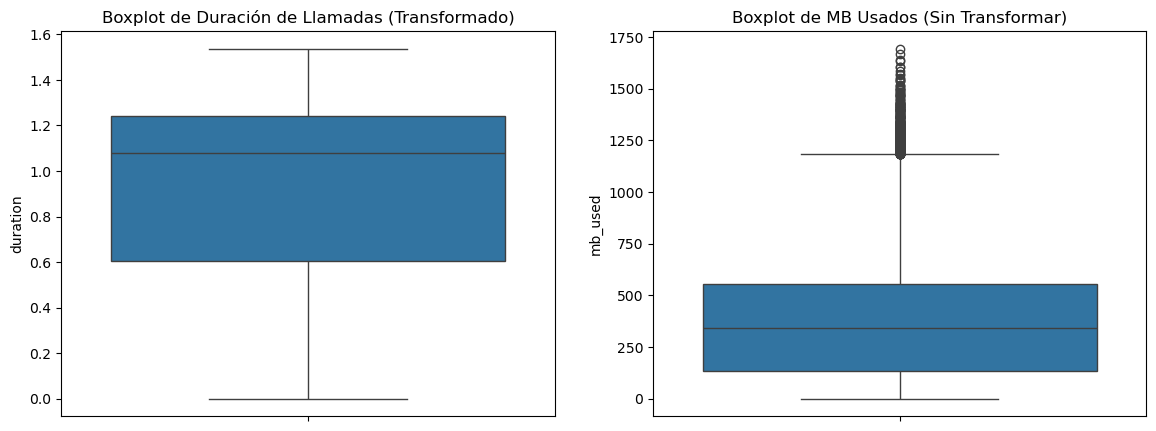

In [10]:
# 📂 Directorio de la carpeta CLEAN
clean_path = "/Users/chants/Desktop/DM_TEL_cucalon/Data/clean/"

# 📌 --- CARGAR LOS ARCHIVOS DESDE CLEAN ---
df_users_clean = pd.read_csv(clean_path + "megaline_users.csv")
df_internet_clean = pd.read_csv(clean_path + "megaline_internet.csv")
df_messages_clean = pd.read_csv(clean_path + "megaline_messages.csv")
df_calls_clean = pd.read_csv(clean_path + "megaline_calls.csv")
df_plans_clean = pd.read_csv(clean_path + "megaline_plans.csv")

print("✅ Datos cargados correctamente desde CLEAN.")

# 📌 --- MANEJO DE CHURN_DATE SOLO EN `megaline_users_clean.csv` ---
df_users_clean["churn_status"] = df_users_clean["churn_date"].apply(lambda x: "Activo" if pd.isna(x) else "Inactivo")

# 📌 --- ELIMINAR LA COLUMNA `churn_date` ---
df_users_clean.drop(columns=["churn_date"], inplace=True)
print("✅ Columna `churn_date` eliminada de `megaline_users_clean.csv`.")

# 📌 --- SESGO Y OUTLIERS ---
# No se transforma `mb_used` ni `messages_sent`, solo `duration`
# Aplicar transformación logarítmica a `duration`
df_calls_clean["duration"] = np.log1p(df_calls_clean["duration"])

# 📌 --- CORRECCIÓN DE OUTLIERS EN `duration` (1 detectado) ---
Q1 = df_calls_clean["duration"].quantile(0.25)
Q3 = df_calls_clean["duration"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorización de outliers en `duration`
df_calls_clean["duration"] = np.where(df_calls_clean["duration"] > upper_bound, upper_bound, df_calls_clean["duration"])
df_calls_clean["duration"] = np.where(df_calls_clean["duration"] < lower_bound, lower_bound, df_calls_clean["duration"])

print("✅ Transformación logarítmica aplicada a `duration` y outlier corregido.")

# 📌 --- EXPORTAR LOS ARCHIVOS LIMPIOS ---
df_users_clean.to_csv(clean_path + "megaline_users.csv", index=False)
df_internet_clean.to_csv(clean_path + "megaline_internet.csv", index=False)
df_messages_clean.to_csv(clean_path + "megaline_messages.csv", index=False)
df_calls_clean.to_csv(clean_path + "megaline_calls.csv", index=False)
df_plans_clean.to_csv(clean_path + "megaline_plans.csv", index=False)

print("\n✅ Archivos limpios guardados en:", clean_path)

# 📌 --- VISUALIZACIÓN FINAL ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Duración de llamadas (Transformado y corregido)
sns.boxplot(y=df_calls_clean["duration"], ax=axes[0])
axes[0].set_title("Boxplot de Duración de Llamadas (Transformado)")

# MB usados (No transformado)
sns.boxplot(y=df_internet_clean["mb_used"], ax=axes[1])
axes[1].set_title("Boxplot de MB Usados (Sin Transformar)")

plt.show()

